# Exercise 10

**Alireza Habibzadeh**

**99109393**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def F(h):
    return np.where(h > 0, 1, 0)

def update_network(A, B, x):
    return F(np.dot(B, A) + x) # F(Recurrent input + external input)

def simulate_network(β, T=20, d=5, N=1000):
    A = np.zeros(N)    
    x = np.zeros(N)
    x[16] = 1
    
    # B
    B = np.full((N, N), -β)  # Start with inhibition from all other neurons
    for i in range(N):
        for j in range(max(0, i-d), min(N, i+d+1)):  # Neighbors
            if i != j:  # No self-coupling
                B[i, j] = 1

    activities = np.zeros((T, N))  # Activities at each time step
    activities[0, :] = A  # Initial activity
    
    # Run simulation
    for t in range(1, T):
        A = update_network(A, B, x)
        activities[t, :] = A

    return activities

def plot_activities(activities, max_index):
    ax = plt.figure(figsize=(12, 6)).gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.locator_params(axis='x', nbins=25)
    plt.locator_params(axis='y', nbins=20)
    plt.grid()
    plt.imshow(activities[:, :max_index], aspect='auto', cmap='binary')
    plt.xlabel("Neuron index")
    plt.ylabel("Time step")
    plt.show()

## $\beta \geq 1$

فکر می‌کنم سوال اشتباه کرده و منظورش این نیست چون اصلا تعادل درست حسابی هم ندارد

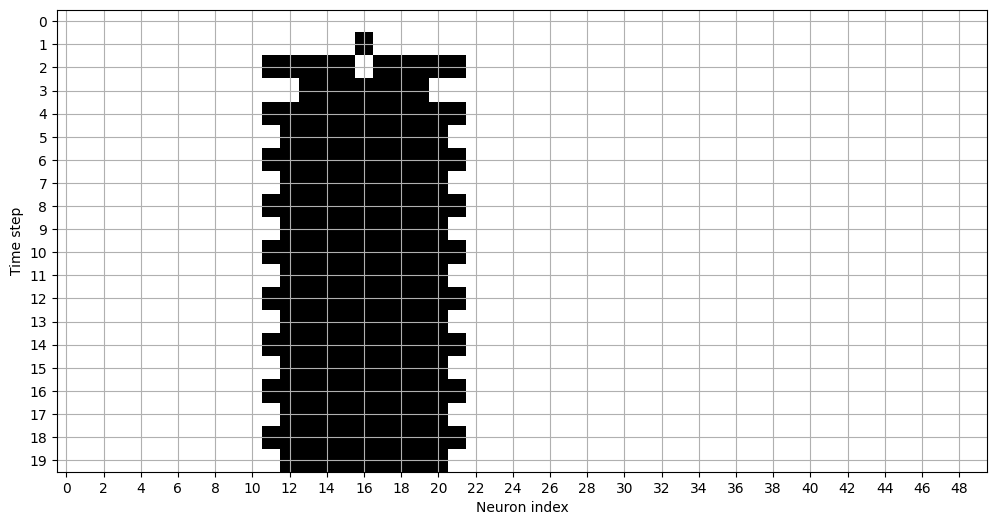

In [37]:
plot_activities(simulate_network(β=1), 50)

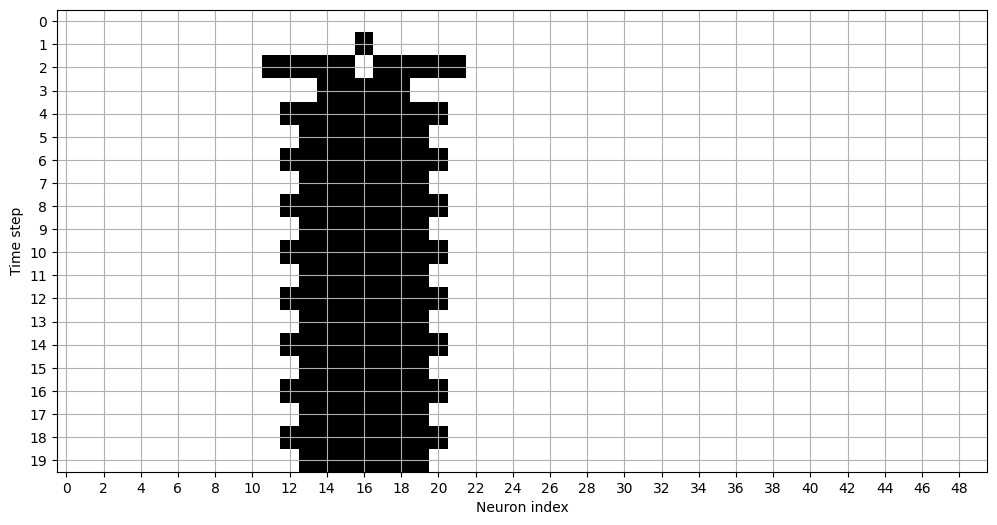

In [38]:
plot_activities(simulate_network(β=1.5), 50)

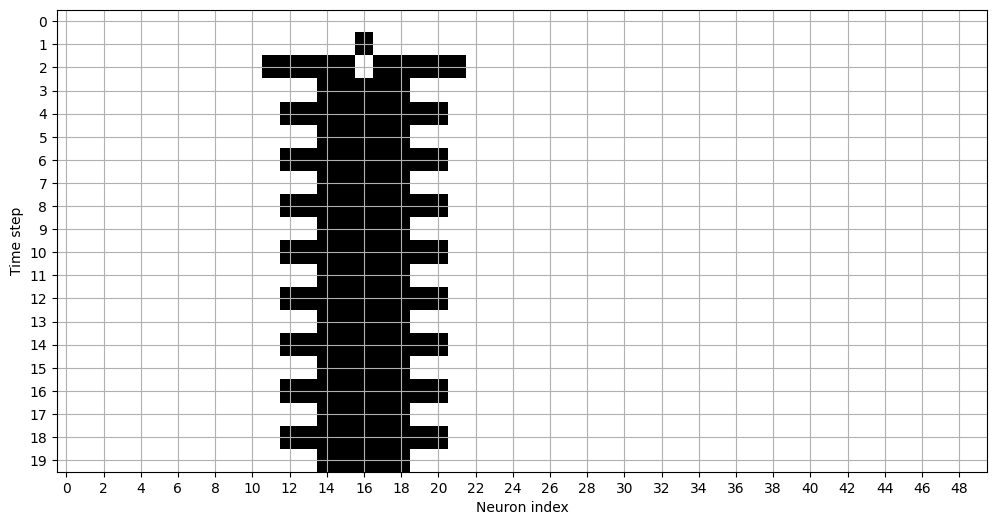

In [39]:
plot_activities(simulate_network(β=2), 50)

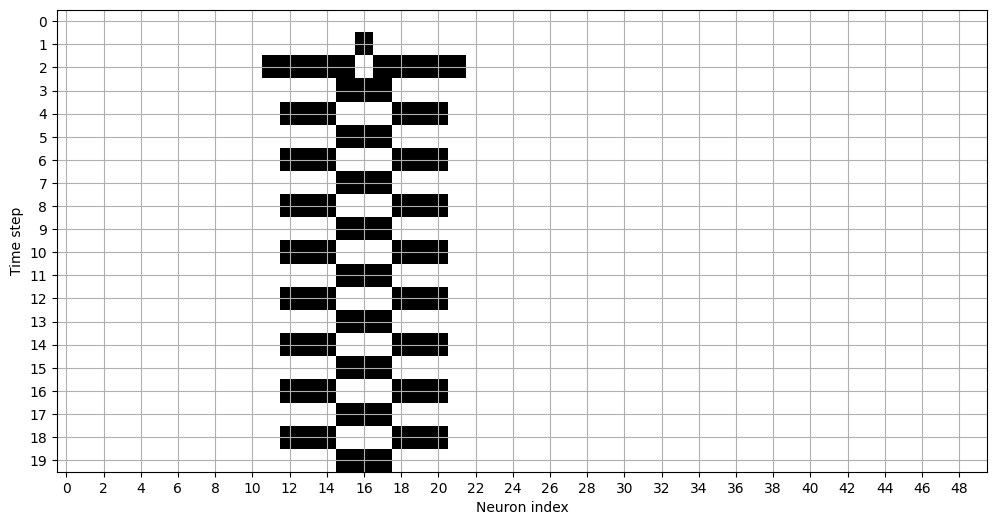

In [40]:
plot_activities(simulate_network(β=3), 50)

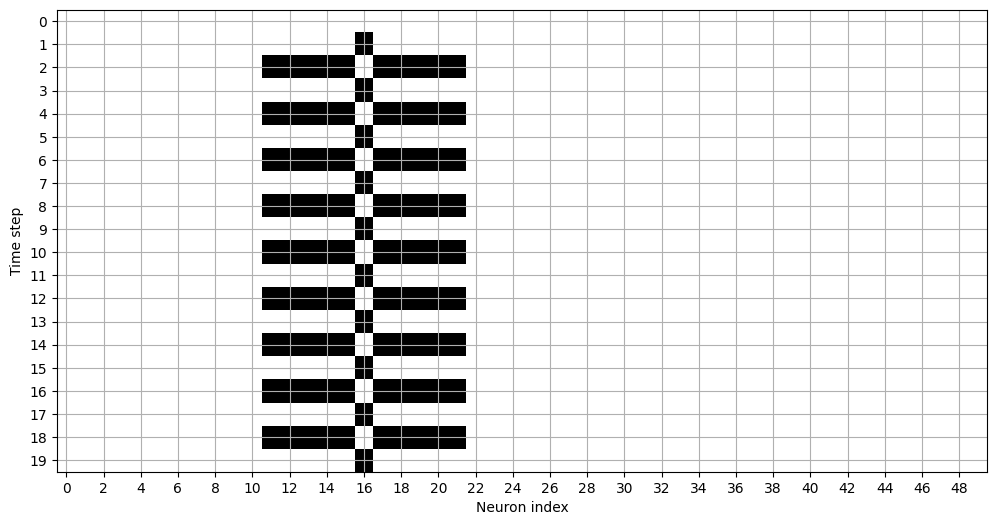

In [41]:
plot_activities(simulate_network(β=4), 50)

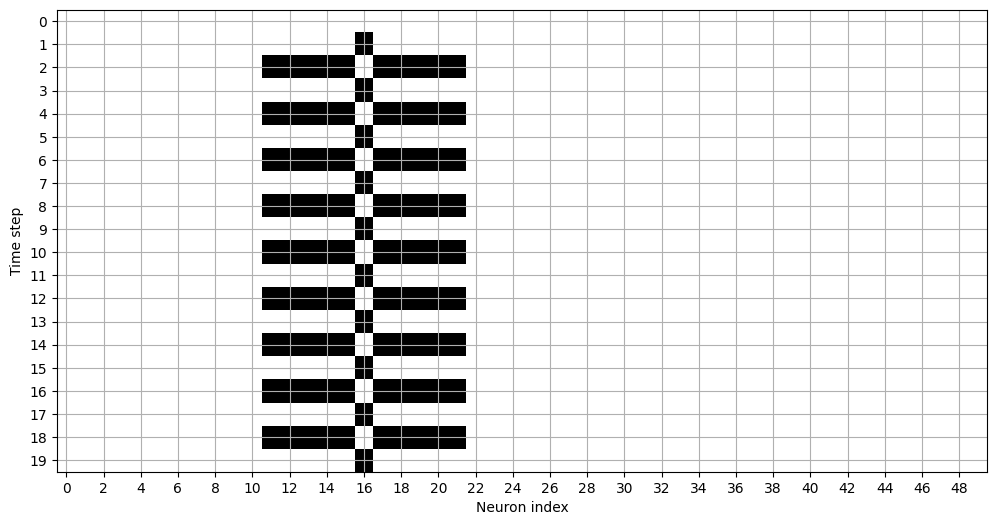

In [42]:
plot_activities(simulate_network(β=10), 50)

## $\beta < 1$

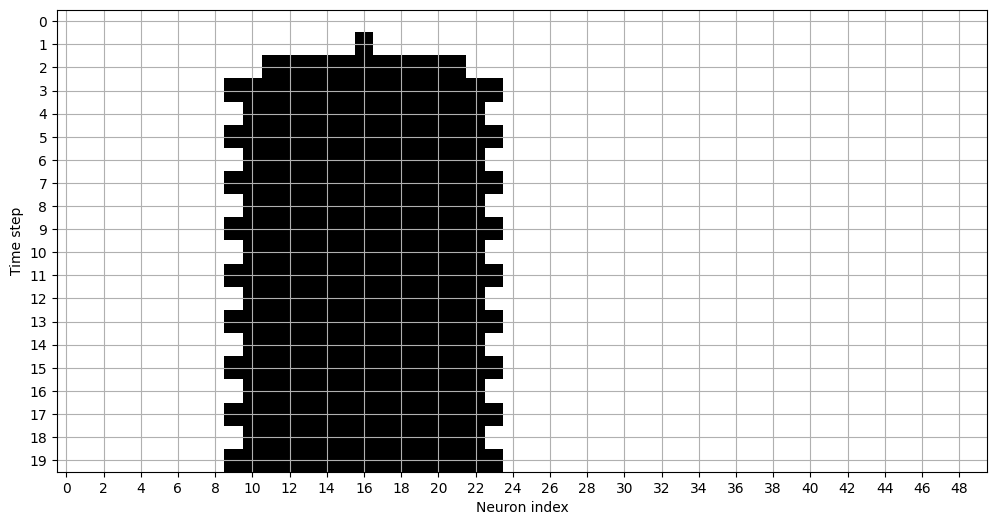

In [11]:
plot_activities(simulate_network(β=0.5), 50)

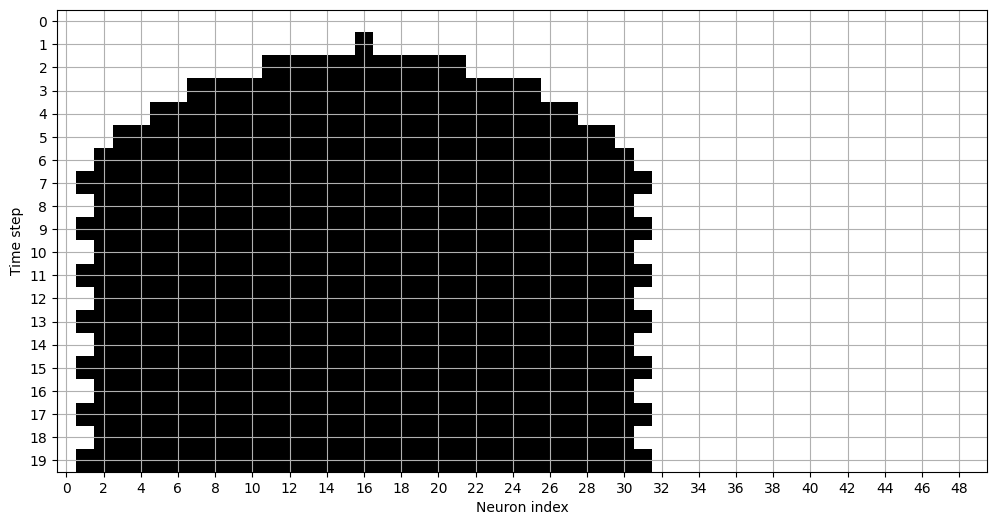

In [12]:
plot_activities(simulate_network(β=0.2), 50)

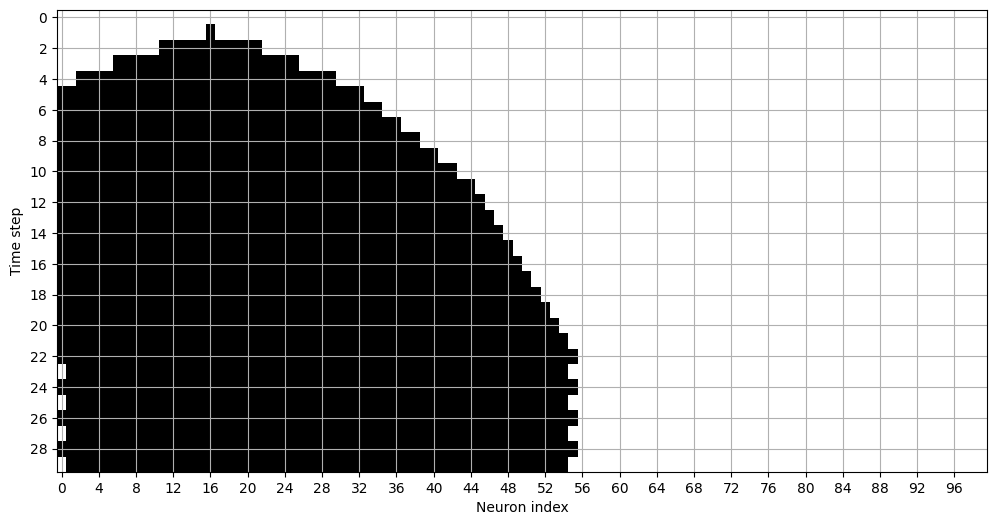

In [15]:
plot_activities(simulate_network(β=0.1, T=30), 100)

از حدود 

$t=4

سمت چپ به دیوار برخورد می‌کند و از این به بعد رشد فقط از راست ادامه دارد تا جایی که به بیشینه‌ی اندازه (که همان مقدار محاسبه شده است و دیوار تاثیری در آن ندارد) برسیم از آنجا نوسان کردن دو نورون ابتدا و انتها شروع می‌شود

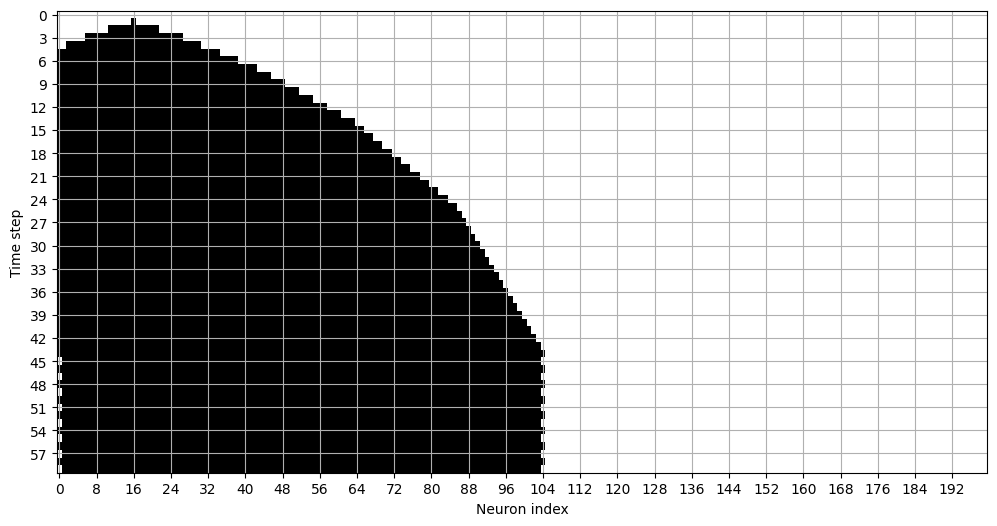

In [20]:
plot_activities(simulate_network(β=0.05, T=60), 200)

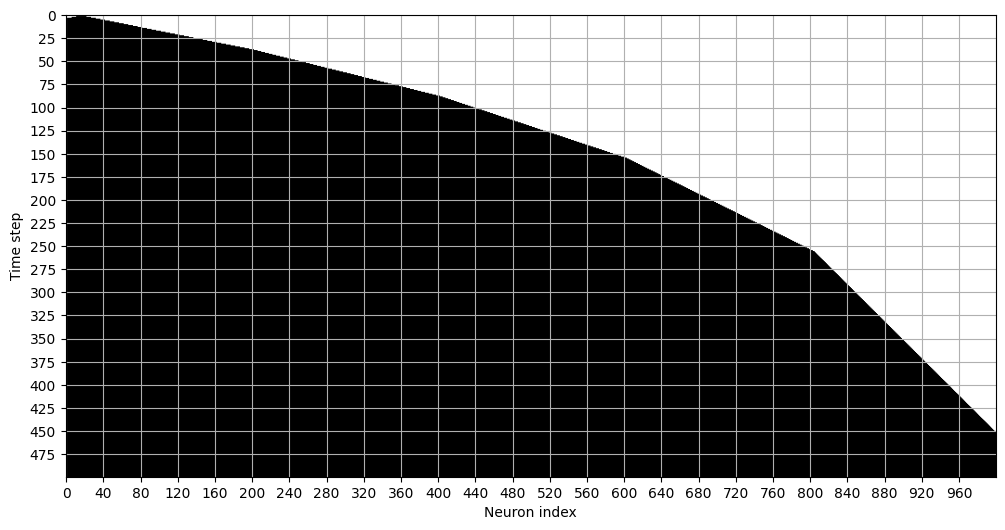

In [31]:
plot_activities(simulate_network(β=0.005, T=500), 1000)

زمانی که طول می‌کشد تا به دیوار چپ برسیم تغییری نمی‌کند و همان است از آنجا فقط از راست رشد داریم ولی این رشد انگار با وقتی که رشد از دو طرف متقارن است فرق می‌کند. انگار این چیزی شبیه خطی است ولی آن سهمی است. و این خطی هم چند جا ظاهرا می‌شکند.